<a href="https://colab.research.google.com/github/zjuiEMLab/rshub/blob/main/demo/Snow-demo-DMRT-BIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brightness temperature and backscatter of a four-layer snow scenario (DMRT-TRI)

In [7]:
import datetime
import numpy as np
!pip install rshub -q

In [ ]:
# Define user token
# Register your account to get a token https://rshub.zju.edu.cn/Registration
token = 'ENTER YOUR TOKEN HERE' 
# Change your task name or project name every time you run a new job
project_name = 'CAS'
task_name = 'DMRT-TRI Active'

In [30]:
# ============== CHANGE YOUR INPUT PARAMETERS HERE ==============
# ====== Parameters not define will be set to default values ======
# Step 1: Define Scenario flag
# 'soil': Bare soil
# 'snow': Snow
# 'veg': Vegetation covered soil
scenario_flag = 'snow'

# Step 2: Define observation description
# 1) Observation mode
# 'bs': Active (Backscatter)
# 'tb': Passive (Brightness temperature)
output_var = 'tb'

# 2) Observation characteristics
fGHz = [37]

# angle=[30, 40, 50] # Incident Angle
angle = np.arange(0,70,5)
angle = angle.tolist()


# Step 3: Define Algorithm flag
# 'qms': DMRT-QMS; 'bic': DMRT-BIC
algorithm = 'tri'

# Step 4: Describe your scenario (Demo shows 3-layer snow)
depth=[6, 1.5, 10, 10] # [cm]
rho=[0.45,0.3,0.21,0.27] # [gmcc]
zp=[1.2,1.2,1.2,1.2] # control size distribution
kc=[8000,10000,6000,5000] #inversely propotional to grain size [m^-1]
Tsnow=[273.15,273.15,273.15,273.15] # Snow temperature [K]
wet=[2, 8, 0, 0]
film=[0, 0, 0, 0]

Tg=273.2 # Ground Temperature [K]
mv=0.4 # soil moisture
clayfrac=0.3 #clay fraction

# Passive parameters to calculate surface backscattering
rough_model = 'QH' # option 1: Q/H model; option 2: Wegmuller and Matzler 1999 model
rough_Q = 1  # polarization mixing factor, unitless          
rough_H = 10 # roughness height factor, unitless # Q = H = 0, means flat bottom surface     

surf_model_setting_passive=[rough_model,rough_Q,rough_H] #'OH'


In [31]:
# Input data for Active DMRT-BIC model
data1 = {
    'scenario_flag': scenario_flag, 
    'output_var': output_var,'fGHz': fGHz,
    'deg0inc':angle,
    'algorithm':algorithm,
    'depth': depth,'rho':rho,'kc':kc,'zp':zp,
    'Tsnow':Tsnow,'Tg':Tg,'film':film,'wet':wet,
    'mv':mv,'clayfrac':clayfrac,'surf_model_setting':surf_model_setting_passive,
    'project_name':project_name,
    'task_name':task_name,
    'token':token,
    'force_update_flag':1
}


## Run models

In [32]:
from rshub import submit_jobs
result1=submit_jobs.run(data1)

{"scenario_flag": "snow", "output_var": "tb", "fGHz": [37], "deg0inc": [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65], "algorithm": "tri", "depth": [6, 1.5, 10, 10], "rho": [0.45, 0.3, 0.21, 0.27], "kc": [8000, 10000, 6000, 5000], "zp": [1.2, 1.2, 1.2, 1.2], "Tsnow": [273.15, 273.15, 273.15, 273.15], "Tg": 273.2, "film": [0, 0, 0, 0], "wet": [2, 8, 0, 0], "mv": 0.4, "clayfrac": 0.3, "surf_model_setting": ["QH", 1, 10], "project_name": "Demo", "task_name": "DMRT-TRI Passive", "token": "0gv?7ov@oo8sc2ybig?owo!fl*##j4", "force_update_flag": 1}


In [33]:
print(result1['result'])

Job submitted!


In [6]:
# Store log information
now = datetime.datetime.now()
logname = 'log_' + now.strftime("%Y%m%d%H%M%D") + '.txt'
f = open('log.txt',"a")
head_string = '======' + now.strftime("%Y%m%d%H%M%D") + '======' + "\n"
f.write(head_string)
f.write(f' project_name = {project_name} \n')
f.write(f' task_name = {task_name1} \n')
f.write(f' data = {data1} \n')
f.write(f' task_name = {task_name2} \n')
f.write(f' data = {data2} \n')
f.write('================================ \n')
f.close()

# Check status of code

In [35]:
from rshub import submit_jobs
result=submit_jobs.check_completion(token, project_name, task_name)
print(result)

{'task_status': 'completed', 'project_name': 'Demo', 'task_name': 'DMRT-TRI Passive'}


# Post Process

In [36]:
from rshub.load_files import load_file
# load mat file with project id, frequencies,variables to load

TB_v=[]
TB_h=[]
data = load_file(token, project_name, task_name,scenario_flag=scenario_flag,algorithm=algorithm,output_var=output_var)
data_passive = data.load_outputs(filename=f"TB_fGHz37.h5") 
TB_v = data_passive['Tb_v0'] # vertical Tbs
TB_h = data_passive['Tb_h0'] # horizontal Tbs
theta_obs = data_passive['inc_angle'] # horizontal Tbs

File size: 0.01 MB
File is small (<= 50 MB), loading into memory...
Loading small file directly into memory...
Sucessfully loaded


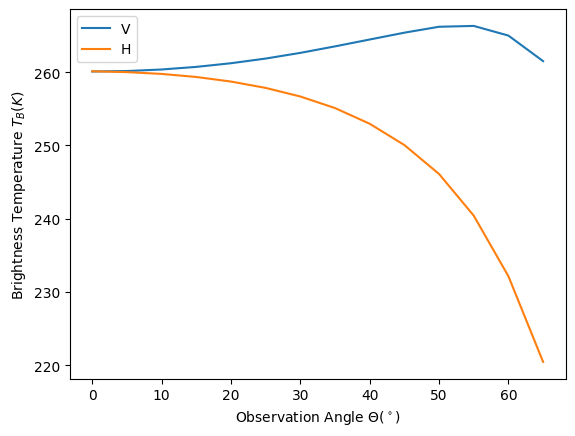

In [37]:
import matplotlib.pyplot as plt

# plot the data
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(theta_obs, TB_v, color='tab:blue')
ax.plot(theta_obs, TB_h, color='tab:orange')
ax.set(xlabel='Observation Angle $\Theta(^\circ)$', ylabel='Brightness Temperature $T_B(K)$')
ax.legend(['V', 'H'])